<a href="https://colab.research.google.com/github/thiagonishimura/Mestrado_Fundamentos_IC/blob/main/Thiago_Atividade_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Atividade 3**

**Sample distribution and sampling distribution | TLC | p-value**

# **A: sample distribution and sampling distribution**

A partir do que foi feito na Atividade 2 “Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho”, crie  uma população artificial dessa variável com uma distribuição Gaussiana e demonstre sample distribution and sampling distribution. Faça avaliações de probabilidade de possíveis eventos.

**Introdução**

Para a realização dessa atividade, tomaremos como base o projeto de pesquisa enviado na atividade 1, o qual é um chatbot inteligente que utiliza LLM para gerar uma consulta SQL e obter informações do banco de dados do DETER Amazônia.

O funcionamento desse chatbot segue o seguinte fluxo de execução:

Recebe a pergunta do usuário em linguagem natural.
Interpreta a pergunta, e com base no conhecimento prévio da estrutura do banco de dados, gera uma consulta SQL.
Acessa o bando de dados do DETER Amazônia e obtem a informação desejada.
Converte essa resposta em uma tabela ou estrutura a resposta com uma linguagem natural para apresentar a resposta ao usuário de forma mais natural.
Com base nessas informações, foi definido tomar como variável de interesse o tempo de resposta do chatbot (em segundos).

**Criação da população artificial**

**Hipóteses para a simulação**
- Variável escolhida: tempo de resposta em segundos
- Tempo médio das respostas: 7.5 segundos.
- Desvio padrão: 1.5 segundo
- Tamanho da população: 10.000

In [ ]:
# Importar as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
# Parâmetros da população
media_respostas = 7.5
desvio_padrao_resposta = 2
tamanho_populacao = 10000

In [ ]:
# Gerar os dados artificiais
np.random.seed(42)
tempos_respostas = np.random.normal(loc= media_respostas, scale= desvio_padrao_resposta, size= tamanho_populacao)

In [ ]:
# Verificar
print(tempos_respostas[:10])

[ 8.49342831  7.2234714   8.79537708 10.54605971  7.03169325  7.03172609
 10.65842563  9.03486946  6.56105123  8.58512009]


**Sample Distribution**

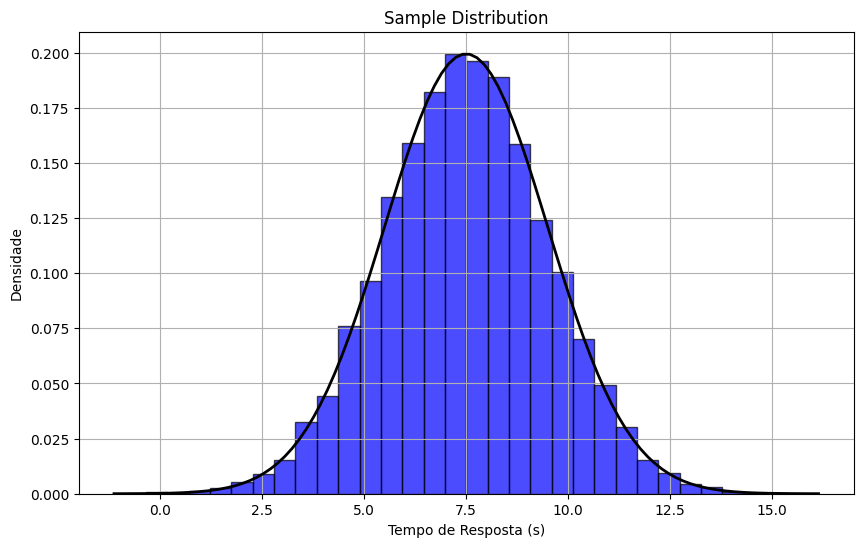

In [ ]:
# Plotar o histograma da população simulada
plt.figure(figsize=(10,6))
plt.hist(tempos_respostas, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')

# gerar a curva
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media_respostas, desvio_padrao_resposta)
plt.plot(x, p, 'k', linewidth=2)

# Formatar e criar as legendas
plt.title('Sample Distribution')
plt.xlabel('Tempo de Resposta (s)')
plt.ylabel('Densidade')
plt.grid(True)
plt.show()

**Sampling Distribution**

Iremos realizar 500 amostras tomando em cada amostra 30 elementos da poulação (tempo de resposta), e apartir dessas amostras iremos criar o histograma Sampling Distribution. Com isso podemos analisar o comportamento da média na população.

In [ ]:
# Parâmetros da amostragem
tamanho_amostra = 30
numero_de_amostras = 500

In [ ]:
# Sorteio das amostras e cálculo das médias
medias_amostras = []

for _ in range(numero_de_amostras):
    amostra = np.random.choice(tempos_respostas, size=tamanho_amostra)
    medias_amostras.append(np.mean(amostra))

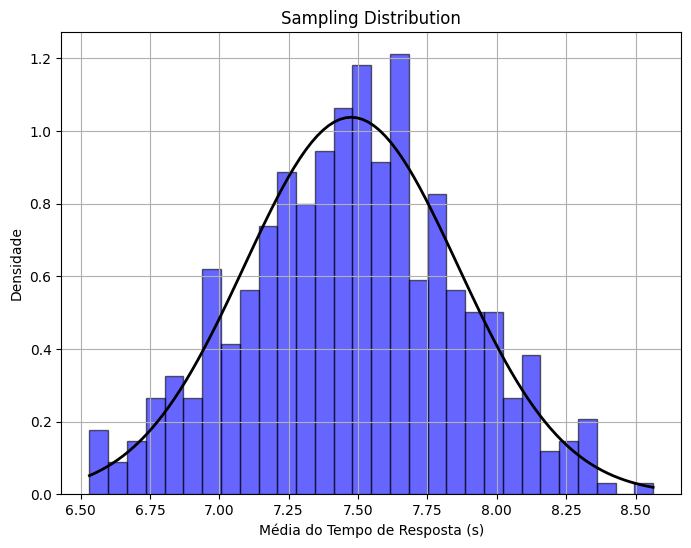

In [ ]:
# Plotando o histograma das médias de amostras
plt.figure(figsize=(8,6))
plt.hist(medias_amostras, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black')

# Curva da distribuição normal
media = np.mean(medias_amostras)
desvio_padrao = np.std(medias_amostras)
x_sampling = np.linspace(min(medias_amostras), max(medias_amostras), 100)
p_sampling = norm.pdf(x_sampling, media, desvio_padrao)
plt.plot(x_sampling, p_sampling, 'k', linewidth=2)

# Plotar o historgrama de distribuição amostral
plt.title('Sampling Distribution')
plt.xlabel('Média do Tempo de Resposta (s)')
plt.ylabel('Densidade')
plt.grid(True)
plt.show()

**Avaliações de probabilidades de Eventos**

In [ ]:
# Probabilidade de tempo de resposta ser menor que 2 segundos
prob_tempo_menor_7 = norm.cdf(7, loc=media_respostas, scale=desvio_padrao_resposta)
print(f'Probabilidade de tempo de resposta < 7 segundos: {prob_tempo_menor_7:.4f}')

# Probabilidade de tempo de resposta ser maior que 3 segundos
prob_tempo_maior_10 = 1 - norm.cdf(10, loc=media_respostas, scale=desvio_padrao_resposta)
print(f'Probabilidade de tempo de resposta > 10 segundos: {prob_tempo_maior_10:.4f}')


Probabilidade de tempo de resposta < 7 segundos: 0.4013
Probabilidade de tempo de resposta > 10 segundos: 0.1056


Foi simulado dois eventos para o tempo de resposta do chatbot:
- A primeira probabilidade de um tempo de resposta ser menor que 7 segundos, simulando uma resposta rápida.
- A segunda probabilidade de um tempo de resposta ser maior que 10 segundos, simulando um tempo de resposta mais lento.

Utilizando a distribuição normal dos tempos de respostas, obtivemos os seguintes resultados:
- **P(tempo de resposta < 7 segundos) ~= 0.4013 (40%)**
- **P(tempo de resposta > 10 segundos) ~= 0.1056 (11%)**

# **B: TLC - Teorema Central do Limite**

Aplique o TLC a função de distribuição gama e avalie quatro diferentes tamanhos de amostra, começando em 10.

Gerar uma população artificial utilizando uma **distribuição gama**, para isso utilizaremos os seguintes parâmetros:
- Parâmetro de forma (K): 2.0
- Parametro de escala (theta): 1.5
- Tamanho da população a ser gerada: 10.000

In [ ]:
# Importação da biblioteca necessária
from scipy.stats import gamma

In [ ]:
# Definindo parâmetros
shape = 2.0
scale = 1.5
populacao = 10000

# Gerando a população
np.random.seed(42)  # para reprodutibilidade
populacao_gama = gamma.rvs(a=shape, scale=scale, size=populacao)

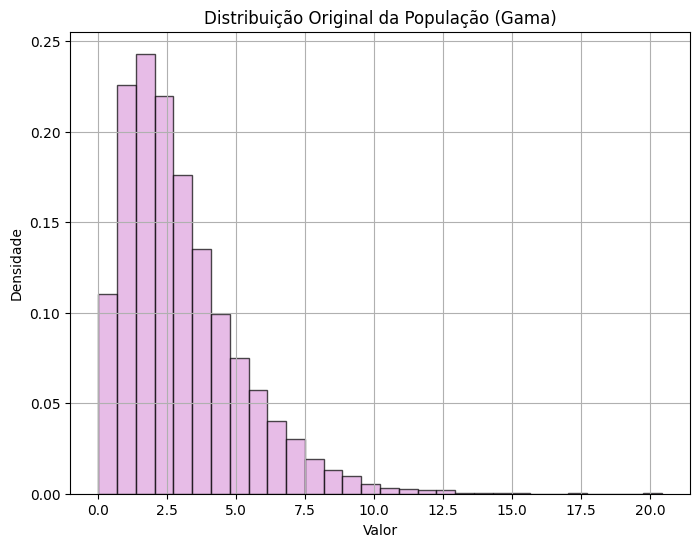

In [ ]:
# Visualizando um histograma da população original
plt.figure(figsize=(8,6))
plt.hist(populacao_gama, bins=30, density=True, alpha=0.7, color='plum', edgecolor='black')
plt.title('Distribuição Original da População (Gama)')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.grid(True)
plt.show()


**Aplicando o Teorema Central do Limite (TLC)**

O TLC tem por definição que, independente da distribuição da população original, a distribuição das médias de amostras tenderá a se aproximar de uma distribuição normal (gaussiana) conforme o tamanho da amostra aumenta.

In [ ]:
# Função para plotar a distribuição das médias para diferentes tamanhos de amostra
def aplicar_tlc(populacao, tamanhos_amostra, numero_de_amostras=500):
    for n in tamanhos_amostra:
        medias_amostrais = []
        for _ in range(numero_de_amostras):
            amostra = np.random.choice(populacao, size=n)
            medias_amostrais.append(np.mean(amostra))

        # Plotar histograma das médias
        plt.figure(figsize=(8,6))
        plt.hist(medias_amostrais, bins=30, density=True, alpha=0.7, color='lightblue', edgecolor='black')

        # Ajustar uma curva normal
        mu_sampling = np.mean(medias_amostrais)
        sigma_sampling = np.std(medias_amostrais)
        x_sampling = np.linspace(min(medias_amostrais), max(medias_amostrais), 100)
        p_sampling = norm.pdf(x_sampling, mu_sampling, sigma_sampling)
        plt.plot(x_sampling, p_sampling, 'k', linewidth=2)

        plt.title(f'Sampling Distribution (n = {n})')
        plt.xlabel('Média das Amostras')
        plt.ylabel('Densidade')
        plt.grid(True)
        plt.show()

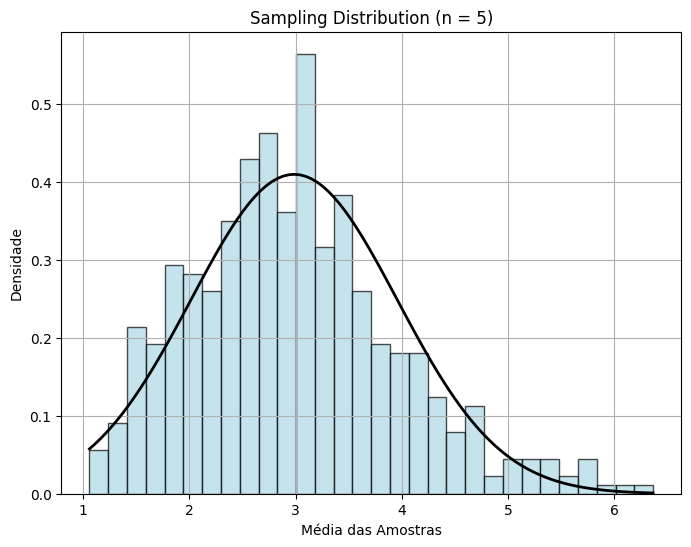

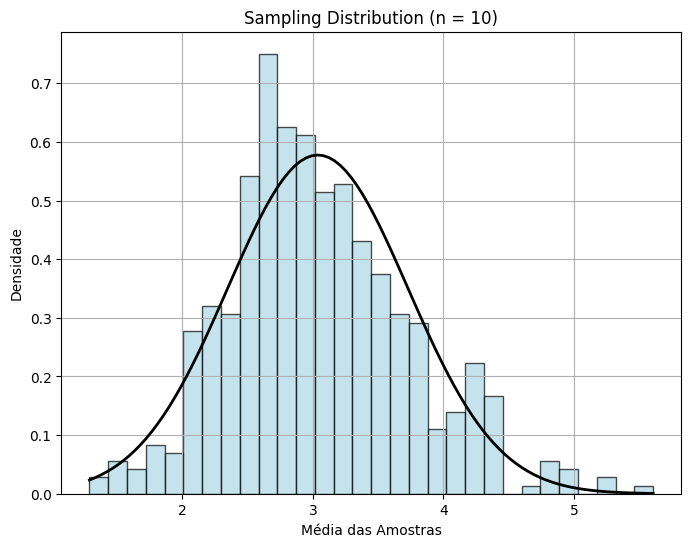

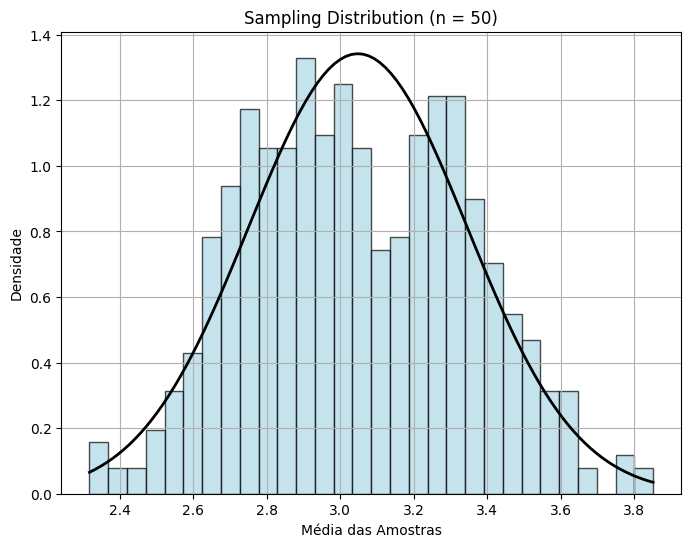

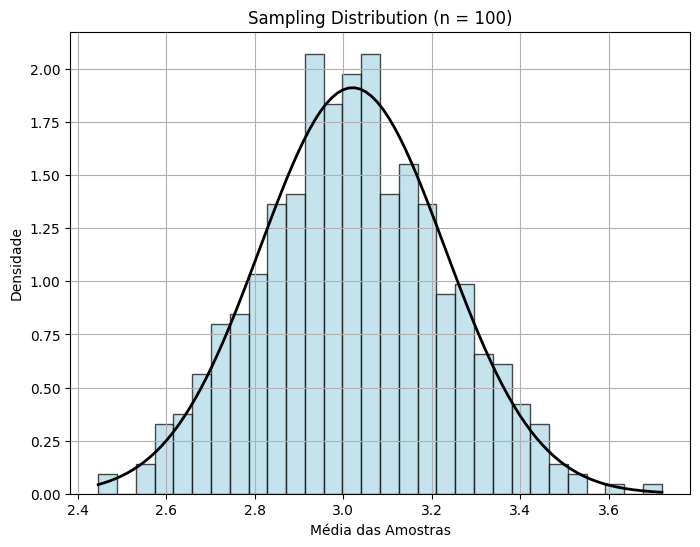

In [ ]:
# Aplicando a função para diferentes tamanhos de amostras.
tamanhos_amostra = [5, 10, 50, 100]
aplicar_tlc(populacao_gama, tamanhos_amostra)

**Discussão**

Podemos observar que para tamanhos de amostras pequenas (5 e 10), a distribuição das médias ainda apresentam assimetria, mas quando o valor de amostras aumentam (50 e 100), podemos observar que essa assimetrica tende a diminuir, aproximando-se cada vez mais de uma destribuição gaussiana.

# **C: p-value**

Faça um programa que mostra o passo a passo para calcular o p-value do evento abaixo. Coloque figuras para cada passo.

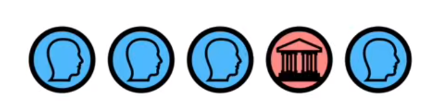

**Introdução**

O cenário apresentado foi o seguinte:
- A moeda foi lançada 5 vezes
- Obtendo 4 caras e 1 coroa

**Hispótese para o teste**

- H0 (Hipótese nula): A moeda é justa, portanto, a probabilidade é de 50% para cada uma das possibilidades (p= 0.5)
- H1 (Hipótese contrária): A moeda tem viés para cara (p > 0.5)

**Calcular o p-value utilizando a distribuição binomial**

Como estamos querendo analizar se o fato de ter saido "cara demais" é um evento raro considerando uma moeda justa.

In [45]:
# Definindo os parâmetros para a realização do cálculo.
n_lancamento = 5 # Número de lançamentos da moeda
x_sucesso = 4 # Número de sucesso (cara)
p_hip_nula = 0.5 # Probabilidade da hipótese nula

In [46]:
# Importar as bibliotecas
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# Cálculo do p-value (unilateral)
p_value = binom.sf(x_sucesso - 1, n_lancamento, p_hip_nula)
print(f'p-value: {p_value:.2f}')

p-value: 0.19


In [60]:
# Espaço amostral
possibilidade_caras = np.arange(0, n_lancamento+1) # número de caras possíveis em 5 lançamentos (0-5)
prob_cara = binom.pmf(possibilidade_caras, n_lancamento, p_hip_nula) # Probabilidade de cada uma das possibilidades
print(prob_cara)

[0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]


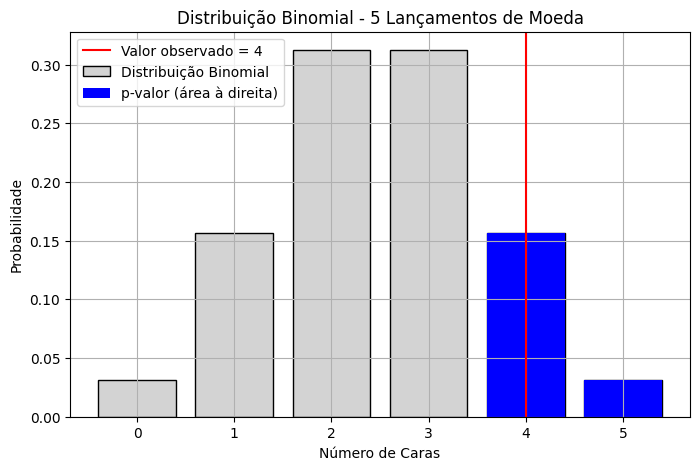

Probabilidade de 4 ou mais caras: 0.1875


In [79]:
# Plotando a distribuição
plt.figure(figsize=(8,5))
plt.bar(possibilidade_caras, prob_cara, color='lightgray', edgecolor='black', label='Distribuição Binomial')

# Destacar área do p-valor (X >= 4) --> 4 e 5
x_p = np.arange(x_sucesso, n_lancamento+1) # Vetor com os valor maior ou igual a x_sucesso (4)
#print(x_p)
probs_p = binom.pmf(x_p, n_lancamento, p_hip_nula)
#print(probs_p)
plt.bar(x_p, probs_p, color='blue', label='p-valor (área à direita)')

plt.axvline(x_sucesso, color='red', linestyle='-', label=f'Valor observado = {x_sucesso}')
plt.title('Distribuição Binomial - 5 Lançamentos de Moeda')
plt.xlabel('Número de Caras')
plt.ylabel('Probabilidade')
plt.legend()
plt.grid(True)
plt.show()
print(f'Probabilidade de 4 ou mais caras: {p_value}')

**Discussão**

O **p-value obtido foi de 0.1875**, o que significa que, se a moeda for justa, tem 18,75% de obtermos 4 ou 5 caras em 5 lançamentos.
Como o valor do p-value foi superior a 0.05 (5%), não temos como rejeitar a hipótese nula, pois o evento não é considerado raro o suficiente para afirmarmos que a moeda está enviesada para cara.

# **D: p-value**

Crie duas Gaussianas como mostrado abaixo (é só variar a média). Sortei 100 sequências de três valores na azul e para cada sequência calcule o p-value a partir da vermelha. Veja a seta vermelha que indica a partir de qual amostra é calculado p-value. Calcule a taxa de falso negativos (p-value acima de 5%).

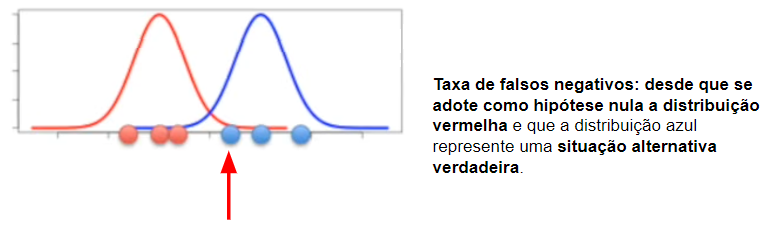